# Note
1. Melakukan percobaan build_models v4.0
2. Dilakukan pada hari Selasa, 09 Juli 2024
3. Tempat di Lab
4. Meliputi Class: 20 Kelas Aksara Jawa:
- Ba, Ca, Da, Dha, Ga, Ha, Ja, Ka, La, Ma, 
- Na, Nga, Nya, Pa, Ra, Sa, Ta, Tha, Wa, Ya

# Setup Environment 

In [ ]:
# pip install tensorflow

In [ ]:
# pip install keras

In [ ]:
# pip install opencv-python

In [ ]:
# pip install imutils

In [ ]:
# pip install matplotlib

In [ ]:
# pip install seaborn

In [ ]:
# pip install scikit-learn

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import os
from os.path import join
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [2]:
# import os
# import pandas as pd
# import cv2

# def convert_to_png(image_path, output_path):
#     # Read the image using OpenCV
#     image = cv2.imread(image_path)
#     # Create the output directory if it doesn't exist
#     os.makedirs(os.path.dirname(output_path), exist_ok=True)
#     # Save the image as PNG
#     cv2.imwrite(output_path, image)

# def get_last_n_parts(path, n):
#     return os.path.join(*path.split(os.sep)[-n:])

# def create_labels_csv(DATASET_PATH, OUTPUT_CSV, OUTPUT_IMAGE_DIR):
#     # List to store image file paths and their corresponding labels and dimensions
#     data = []

#     # Traverse the dataset directory
#     for root, dirs, files in os.walk(DATASET_PATH):
#         for file in files:
#             if file.endswith(('.jpg', '.jpeg', '.png')):
#                 # Get the class label from the subdirectory name
#                 label = os.path.basename(root)
#                 # Get the full file path
#                 file_path = os.path.join(root, file)
                
#                 # Create a new file path for the PNG image
#                 relative_path = os.path.relpath(file_path, DATASET_PATH)
#                 png_file_path = os.path.join(OUTPUT_IMAGE_DIR, os.path.splitext(relative_path)[0] + '.png')
                
#                 # Convert the image to PNG
#                 convert_to_png(file_path, png_file_path)
                
#                 # Get image dimensions
#                 img = cv2.imread(file_path)
#                 height, width, _ = img.shape
                
#                 # Get only the last 3 parts of the path for CSV
#                 csv_path = get_last_n_parts(png_file_path, 2)
                
#                 # Append to the data list including dimensions
#                 data.append([csv_path, width, height, label])
    
#     # Create a DataFrame from the data list
#     df = pd.DataFrame(data, columns=['file_path', 'width', 'height', 'label'])
    
#     # Save the DataFrame to a CSV file
#     df.to_csv(OUTPUT_CSV, index=False)
#     print(f'Labels CSV file created at: {OUTPUT_CSV}')

# # Define the paths for the two datasets and their respective output directories
# DATASET_PATH = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\CustomData\\v.6_all_data_custom\\"
# OUTPUT_CSV = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\labels.csv"
# OUTPUT_IMAGE_DIR = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\"

# # Process the first dataset
# create_labels_csv(DATASET_PATH, OUTPUT_CSV, OUTPUT_IMAGE_DIR)

In [4]:
import pandas as pd

# Path ke dua file CSV yang berbeda
path_main = "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)
df.head()

,file_path,width,height,label
0,ba\002798ad-631c-4f0c-b899-aa66fb5c2ac1.png,239,167,ba
1,ba\040ab1c7-bffa-4a93-8c42-54e5597f2243.png,96,67,ba
2,ba\0789a0d8-e129-48ec-b74e-2e53f4a7ece9.png,235,166,ba
3,ba\11f6c317-635a-4e64-8552-05bf8b7b3a95.png,96,67,ba
4,ba\13469389-6f9b-43dc-be99-8dfbfaae51cb.png,235,165,ba


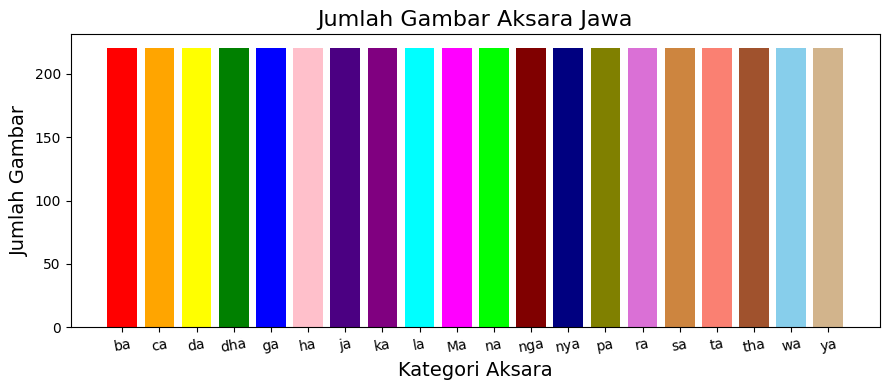

In [5]:
import matplotlib.pyplot as plt
import os

# Define function to count files in each directory
def count_files(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    return num_files

# Define paths for two sources
source_paths = [
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ba",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ca",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\da",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\dha",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ga",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ha",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ja",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ka",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\la",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ma",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\na",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\nga",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\nya",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\pa",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ra",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\sa",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ta",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\tha",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\wa",
    "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ya"
]

# Count files for each path
file_counts = [count_files(path) for path in source_paths]

# Define the input path aksara
aksara_categories = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'Ma', 'na',
                     'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple', 
          'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'orchid', 'peru', 
          'salmon', 'sienna', 'skyblue', 'tan']  # Colors for each bar

# Create bar chart
plt.figure(figsize=(9, 4))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = path_main  
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (112, 112)
INPUT_SHAPE = (112, 112, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    return img

# Load images with custom preprocessing applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

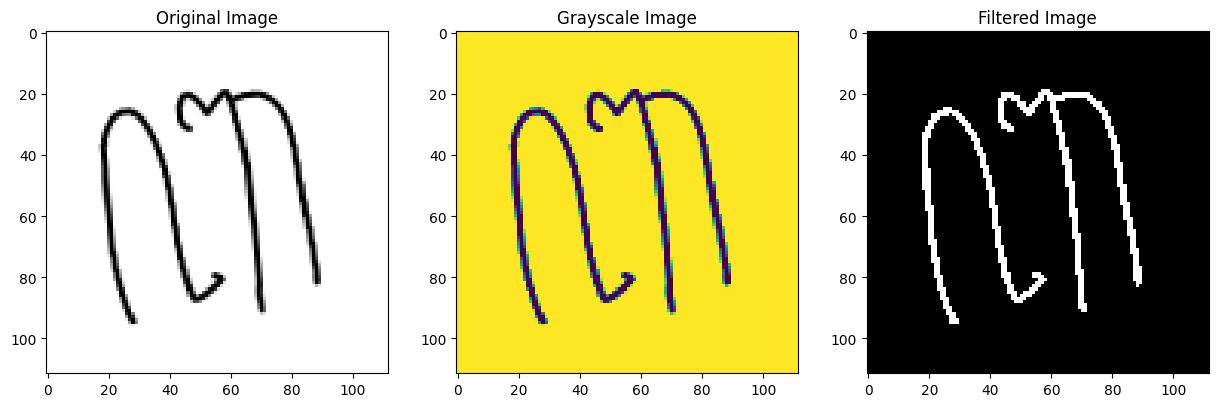

In [7]:
# Select one image to display
index_to_display = 100

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('on')

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(grayscale_image)
plt.axis('on')

plt.subplot(1, 3, 3)
plt.title('Filtered Image')
# plt.imshow(filtered_image, cmap='gray')
plt.imshow(filtered_image, cmap='gray')
plt.axis('on')

plt.show()

In [8]:
# Reshape X_filtered
X_filtered_reshaped = X_filtered.reshape(-1, 112, 112, 1).astype("float32") / 255  # Reshape dan normalisasi
# X_filtered_reshaped = X_filtered.reshape(-1, 112, 112, 1)

print("X_filtered shape after reshape:", X_filtered_reshaped.shape)

X_filtered shape after reshape: (4400, 112, 112, 1)


In [9]:
from sklearn.model_selection import train_test_split

# Tahap pertama: Membagi data menjadi data pelatihan (70%) dan data sementara (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_filtered_reshaped, y_label, test_size=0.3, random_state=37)

# Tahap kedua: Membagi data sementara menjadi data validasi (20%) dan data pengujian (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=37)

# Verifikasi ukuran data
print("Ukuran data pelatihan:", X_train.shape, y_train.shape)
print("Ukuran data validasi:", X_val.shape, y_val.shape)
print("Ukuran data pengujian:", X_test.shape, y_test.shape)

Ukuran data pelatihan: (3080, 112, 112, 1) (3080, 20)
Ukuran data validasi: (880, 112, 112, 1) (880, 20)
Ukuran data pengujian: (440, 112, 112, 1) (440, 20)


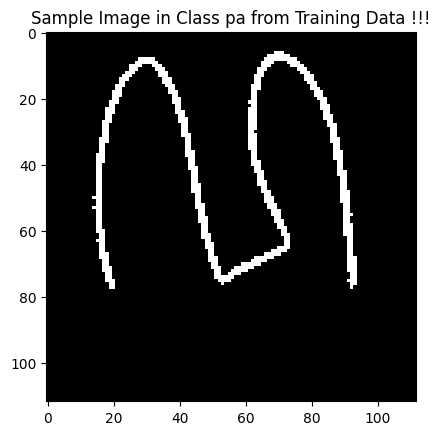

In [10]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample Image in Class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[0])]))
plt.axis('on')
plt.show()

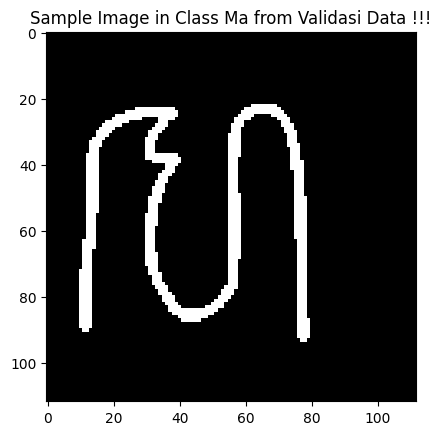

In [11]:
# Menampilkan salah satu gambar dari data validasi
plt.imshow(X_val[77], cmap='gray')
plt.title("Sample Image in Class {} from Validasi Data !!!".format(AKSARA[np.argmax(y_val[77])]))
plt.axis('on')
plt.show()

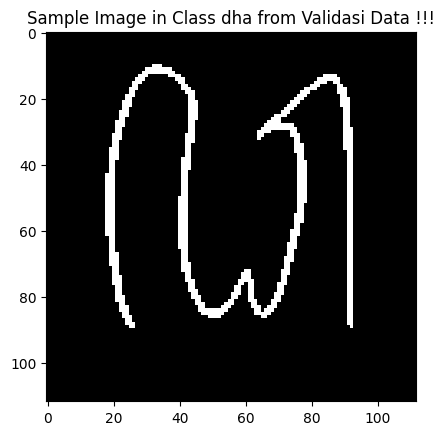

In [12]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_test[55], cmap='gray')
plt.title("Sample Image in Class {} from Validasi Data !!!".format(AKSARA[np.argmax(y_test[55])]))
plt.axis('on')
plt.show()

# Build the Model

## Model 1 - Dropout(0.1) + learning_rate=0.0001 + weight_decay=1e-4 + clipnorm=0.5

In [33]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Initialize Sequential model
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 4
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten
model.add(Flatten())
# Dense layers 1
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Dense layers 2
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Output layer
model.add(Dense(20, activation='softmax'))

In [34]:
# Kompilasi Model
optimizer = Adam(learning_rate=0.00001, weight_decay=1e-4, clipnorm=0.5)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_130 (Conv2D)             │ (None, 112, 112, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_150         │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_131 (Conv2D)             │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_151         │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_70 (Dropout)            │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_132 (Conv2D)             │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_152         │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_133 (Conv2D)             │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_153         │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_134 (Conv2D)             │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_154         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_135 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_155         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_136 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_156         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_137 (Conv2D)             │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 13,081,460 (49.90 MB)

 Trainable params: 13,072,628 (49.87 MB)

 Non-trainable params: 8,832 (34.50 KB)

In [35]:
# Train the model
history_v1 = model.fit(X_train, 
                       y_train, 
                       epochs=100, 
                       batch_size=64, 
                       validation_data=(X_val, y_val))

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.0466 - loss: 4.5882 - val_accuracy: 0.0545 - val_loss: 3.0735
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.0577 - loss: 4.5271 - val_accuracy: 0.0545 - val_loss: 3.2271
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.0498 - loss: 4.5229 - val_accuracy: 0.0477 - val_loss: 3.4107
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.0496 - loss: 4.5000 - val_accuracy: 0.0477 - val_loss: 3.6110
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.0788 - loss: 4.3079 - val_accuracy: 0.0477 - val_loss: 3.9770
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.0644 - loss: 4.3192 - val_accuracy: 0.0477 - val_loss: 4.1432
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.0646 - loss: 4.4304 - val_accuracy: 0.0477 - val_loss: 4.3275
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.0782 - loss: 4.2587 - val_accuracy: 0.0477 - v

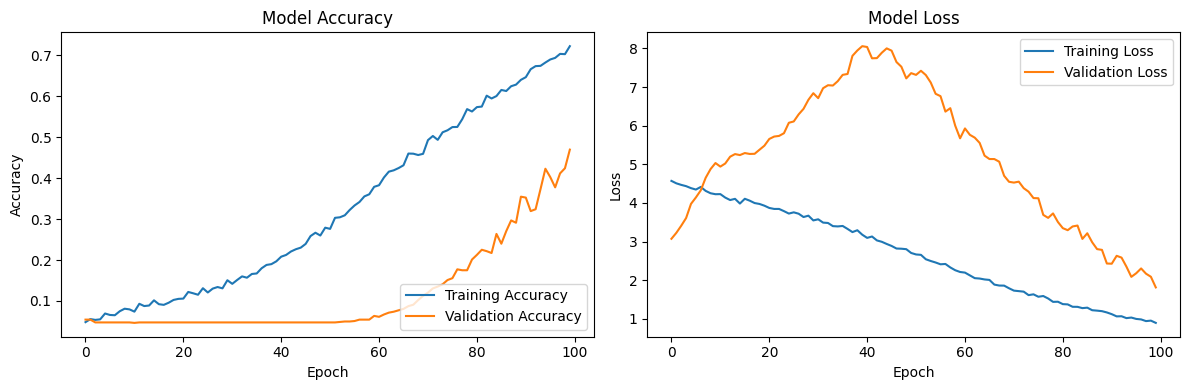

In [36]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v1.history.get('accuracy', [])
test_acc = history_v1.history.get('val_accuracy', [])
loss = history_v1.history.get('loss', [])
test_loss = history_v1.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [37]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.4687 - loss: 1.8538
Loss: 1.7566784620285034
Accuracy: 0.49318182468414307


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics
import numpy as np
import tensorflow as tf

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print metrik evaluasi
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step
Precision: 0.6234632669108062
Recall: 0.49318181818181817
F1 Score: 0.4836509772019556
Log Loss: 2.6116549650736824
Accuracy: 0.49318181818181817


c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

          ba       0.53      0.43      0.48        23
          ca       1.00      0.10      0.17        21
          da       0.75      0.55      0.63        22
         dha       0.14      0.05      0.07        20
          ga       0.40      0.43      0.42        23
          ha       0.42      0.70      0.53        20
          ja       1.00      0.85      0.92        20
          ka       1.00      0.32      0.48        22
          la       0.82      0.38      0.51        24
          Ma       0.86      0.72      0.78        25
          na       0.41      0.50      0.45        18
         nga       0.41      0.87      0.56        23
         nya       1.00      0.24      0.38        17
          pa       0.20      0.90      0.33        21
          ra       0.49      0.95      0.64        20
          sa       1.00      0.62      0.76        26
          ta       0.00      0.00      0.00        21
         tha       0.58    

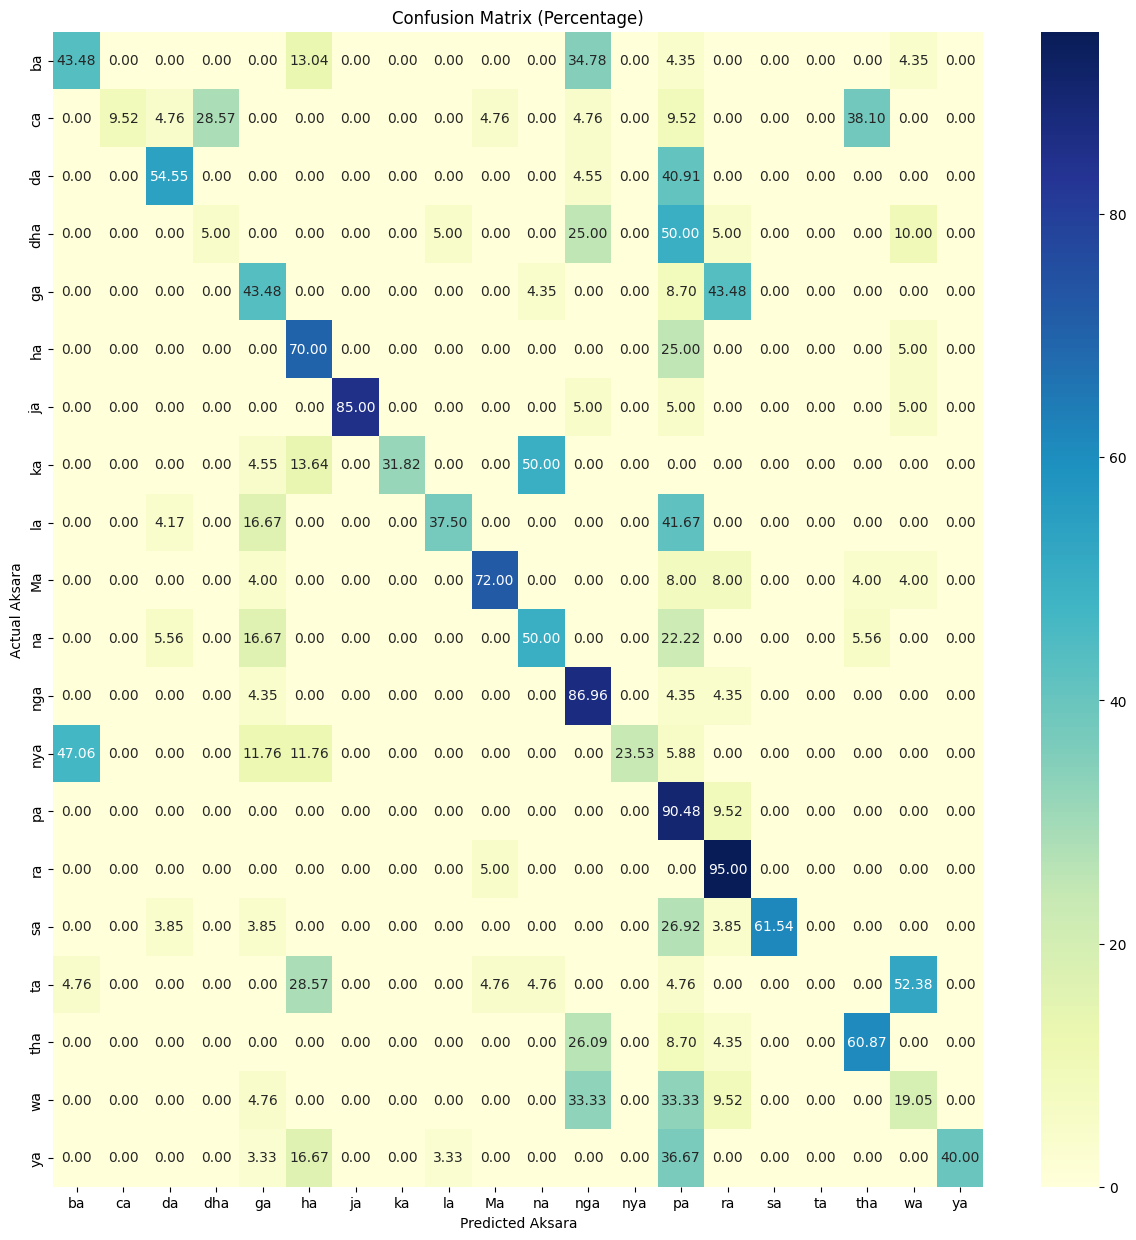

In [40]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
total_per_class = np.sum(conf_matrix, axis=1)
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

## Model 2 - BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001) + Dropout(0.2) + learning_rate=0.001 

In [70]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Initialize Sequential model
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=INPUT_SHAPE))
model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 4
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten
model.add(Flatten())
# Dense layers 1
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization(momentum=0.1))
model.add(Dropout(0.2))
# Dense layers 2
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(momentum=0.1))
model.add(Dropout(0.2))
# Output layer
model.add(Dense(20, activation='softmax'))

In [71]:
# Kompilasi Model
# optimizer = SGD(learning_rate=0.01, weight_decay=1e-4, clipnorm=0.1)
optimizer = SGD(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_312 (Conv2D)             │ (None, 112, 112, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_360         │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_313 (Conv2D)             │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_361         │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_120               │ (None, 56, 56, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_168 (Dropout)           │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_314 (Conv2D)             │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_362         │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_315 (Conv2D)             │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_363         │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_121               │ (None, 28, 28, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_169 (Dropout)           │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_316 (Conv2D)             │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_364         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_317 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_365         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_318 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_366         │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_122               │ (None, 14, 14, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_170 (Dropout)           │ (None, 14, 14, 128)    │             

 Total params: 13,081,460 (49.90 MB)

 Trainable params: 13,072,628 (49.87 MB)

 Non-trainable params: 8,832 (34.50 KB)

In [72]:
# Train the model
history_v2 = model.fit(X_train, 
                       y_train, 
                       epochs=30, 
                       batch_size=64, 
                       validation_data=(X_val, y_val))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.0549 - loss: 4.0398 - val_accuracy: 0.0364 - val_loss: 6.2833
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.0600 - loss: 3.9277 - val_accuracy: 0.0614 - val_loss: 5.4061
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.0700 - loss: 3.7733 - val_accuracy: 0.0693 - val_loss: 4.7556
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.0956 - loss: 3.5753 - val_accuracy: 0.0932 - val_loss: 4.2616
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.1147 - loss: 3.3988 - val_accuracy: 0.0636 - val_loss: 6.5789
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.1552 - loss: 3.1446 - val_accuracy: 0.0727 - val_loss: 5.7939
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.1866 - loss: 3.0267 - val_accuracy: 0.1216 - val_loss: 4.0733
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.2210 - loss: 2.7989 - val_accuracy: 0.1466 - val_loss:

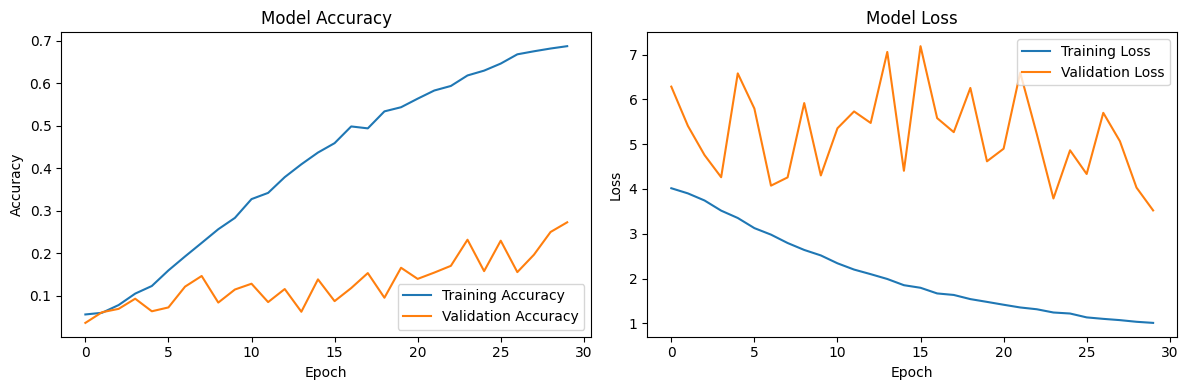

In [73]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v2.history.get('accuracy', [])
test_acc = history_v2.history.get('val_accuracy', [])
loss = history_v2.history.get('loss', [])
test_loss = history_v2.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [74]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.2896 - loss: 3.4984
Loss: 3.347886800765991
Accuracy: 0.3136363625526428


In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics
import numpy as np
import tensorflow as tf

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print metrik evaluasi
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step
Precision: 0.4094600397913307
Recall: 0.31363636363636366
F1 Score: 0.27372733695923546
Log Loss: 2.7717225841092326
Accuracy: 0.31363636363636366


c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

          ba       0.17      0.09      0.11        23
          ca       0.00      0.00      0.00        21
          da       1.00      0.27      0.43        22
         dha       0.00      0.00      0.00        20
          ga       0.50      0.13      0.21        23
          ha       0.00      0.00      0.00        20
          ja       0.62      0.75      0.68        20
          ka       0.00      0.00      0.00        22
          la       0.61      0.46      0.52        24
          Ma       0.54      0.76      0.63        25
          na       1.00      0.06      0.11        18
         nga       0.41      0.48      0.44        23
         nya       0.00      0.00      0.00        17
          pa       0.15      0.86      0.25        21
          ra       0.34      1.00      0.51        20
          sa       0.31      0.42      0.36        26
          ta       0.20      0.05      0.08        21
         tha       1.00    

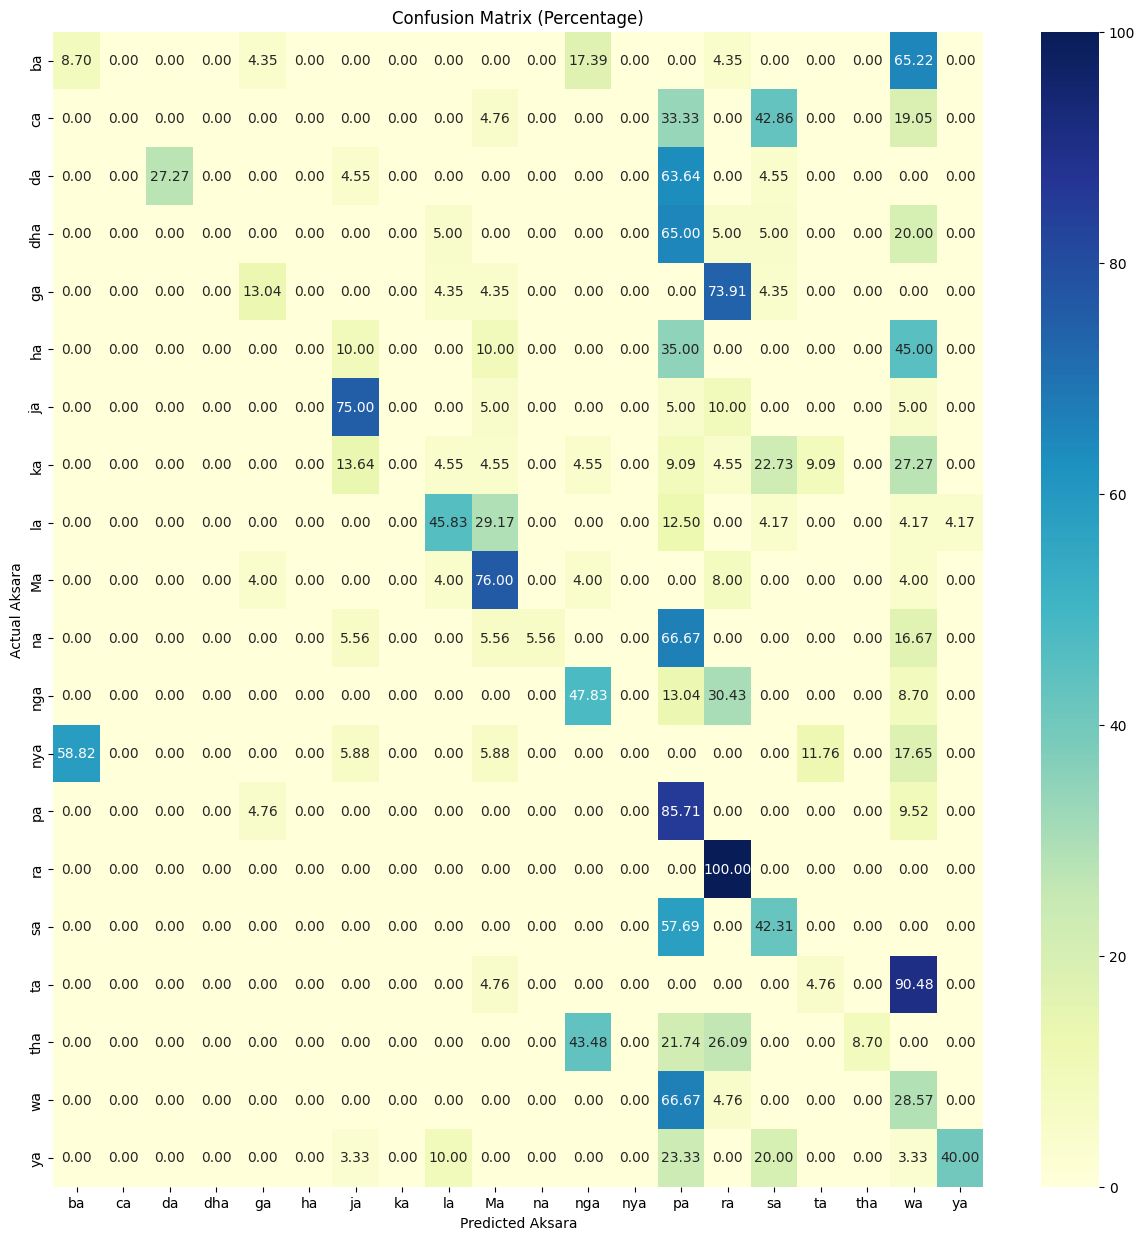

In [76]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
total_per_class = np.sum(conf_matrix, axis=1)
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()